<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


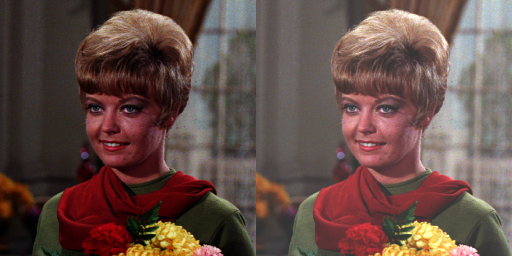

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
print('mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.cpmverScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


**TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:  

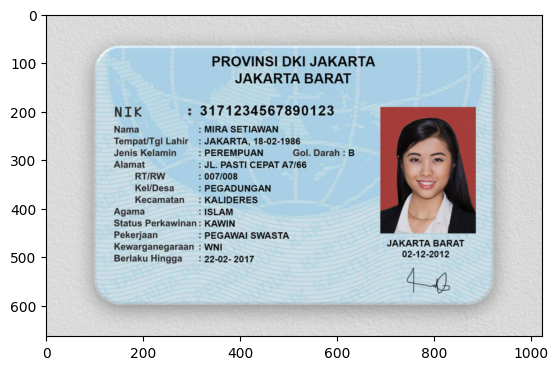

In [10]:
ktp = cv.imread("/content/drive/MyDrive/ktp.jpg")
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

plt.imshow(ktp)

melakukan inverse pada Citra
--------------------------------


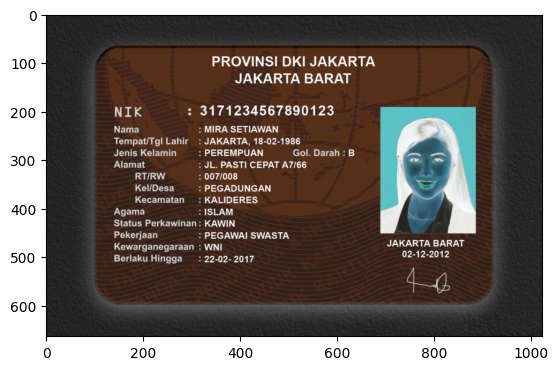

In [11]:
print('melakukan inverse pada Citra')
print('--------------------------------')
inverse = 255 - ktp
plt.imshow(inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras[1.0 - 3.0]: 2


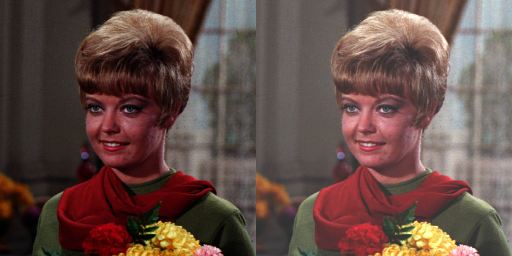

In [13]:
def truncate(value):
    if value < 0:
        return 0
    elif value > 255:
        return 255
    else:
        return value

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras[1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original2 = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# mengubah tingkat kecerahan
# Mengubah kontras
brightness_contrast_image = np.zeros(original.shape, original.dtype)

factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Transformasi brightness dan contrast
            pixel_value = factor * (original[y, x, c] - 128) + 128 + brightness
            # Terapkan fungsi truncate
            brightness_contrast_image[y, x, c] = truncate(pixel_value)

# Menggabungkan citra asli dan hasil transformasi
final_frame = cv.hconcat([original, brightness_contrast_image.astype(np.uint8)])

# Menampilkan citra hasil
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Transformasi Logarithmic Brightness pada citra
---------------------------------------------


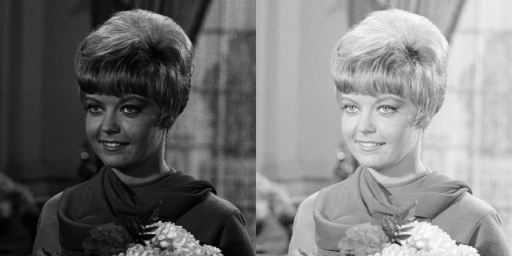

In [14]:

print('Transformasi Logarithmic Brightness pada citra')
print('---------------------------------------------')

# Memuat citra asli
original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

# Mengubah citra ke grayscale untuk transformasi logaritma
gray_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Menentukan konstanta c
c = 255 / np.log(1 + np.max(gray_image))

# Menerapkan transformasi logaritma pada setiap piksel
log_image = c * (np.log(1 + gray_image))

# Mengubah hasil menjadi tipe uint8 untuk citra
log_image = np.array(log_image, dtype=np.uint8)

# Menggabungkan citra asli dan hasil transformasi logaritmik
final_frame = cv.hconcat([gray_image, log_image])

# Menampilkan citra hasil
cv2_imshow(final_frame)